# Phase 2 – Data Preparation & Transformation (Laptop Dataset)

**Objective:**  
Prepare the cleaned laptop dataset for analysis and visualization in Power BI by improving data quality and creating structured features.

**Steps Performed:**  
1. **Data Quality Evaluation** – Checked for inconsistencies, missing values, and duplicates.  
2. **Handling Missing & Duplicate Data** – Filled missing specifications where possible and removed duplicate entries.  
3. **Standardization & Normalization** – Unified formats for RAM, Storage, Display, Battery, Processor, and Warranty columns.  
4. **Feature Engineering** – Extracted key variables such as:
   - `RAM_GB`
   - `Storage_TB`
   - `Display_inch`
   - `Battery_mAh`
   - `Processor_Brand` & `Processor_Gen_Num`
   - `Warranty_Years`
5. **Outlier Handling** – Applied capping to extreme values to maintain consistency.  
6. **Final Structuring** – Prepared a clean dataset ready for direct integration with Power BI dashboards.


In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
df = pd.read_csv("flipkart_laptop.csv")

In [410]:
df.head()

,Name,Price,Discount,Original_price,Description,Product_left
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18% off,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18% off,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17% off,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11% off,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21% off,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            984 non-null    object 
 1   Price           984 non-null    int64  
 2   Discount        874 non-null    object 
 3   Original_price  881 non-null    float64
 4   Description     984 non-null    object 
 5   Product_left    983 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.3+ KB


In [414]:
df.isnull().sum()

Name                0
Price               0
Discount          110
Original_price    103
Description         0
Product_left        1
dtype: int64

In [416]:
df.duplicated().sum()

46

Let’s Remove Duplicate Records for Data Consistency

In [419]:
df.drop_duplicates(inplace=True)

In [421]:
# 1. Fill missing Disount with Zero
df['Discount'] = df['Discount'].fillna(0)

# Fill original Price 
df['Original_price'] = df['Original_price'].fillna(df['Price'])


In [423]:
df.columns

Index(['Name', 'Price', 'Discount', 'Original_price', 'Description',
       'Product_left'],
      dtype='object')


Let’s Extract and Standardize laptop Brands for Consistency

In [426]:

# List of valid brands(lower case)
brand_laptop = [b.lower() for b in [
    "Dell","HP","Lenovo","Acer","Asus","Apple","Microsoft","Samsung",
    "MSI","Razer","Alienware","Toshiba","Fujitsu","Huawei","LG",
    "Panasonic","Sony VAIO","Xiaomi","Realme","Infinix","Honor",
    "Chuwi","Avita"
]]

# Clean brands: if not valid, try second word
def clean_brand(name):
    words = name.lower().split()
    if not words:
        return "unknown"
    
    if words[0] in brand_laptop:
        return words[0].title()
    elif len(words) > 1 and words[1] in brand_laptop:
        return words[1].title()
    else:
        return "Unknown"

df["Brand"] = df["Name"].apply(clean_brand)


### Discount Column Cleaning
- Removed `% off` and `%` from `Discount` and stripped extra spaces.  
- Converted the column to numeric type for analysis; invalid values set as `NaN`.  


In [429]:
# Discount clean
df['Discount'] = (
    df['Discount'].astype(str)
    .str.replace("% off", "",regex=False)
    .str.replace("%", "", regex=False)
    .str.strip()
)

# convert Discount to numeric
df['Discount'] = pd.to_numeric(df['Discount'], errors ='coerce')

In [431]:
df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell


### RAM Column Extraction
- Extracted RAM size (in GB) from the `Description` column using regex.  
- Converted the extracted values to numeric (`float`) for analysis.  


In [434]:
df["RAM_GB"] = df["Description"].str.extract(r"(\d+)\s*GB").astype(float)
df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0


### Operating System (OS) and Platform Extraction
- Extracted the operating system (OS) from the `Description` column using regex. Captured common OS types like **Mac OS, Windows, DOS, and Chrome**.
- Created a new `Platform` column to categorize laptops into broader groups:  
  - `Mac` for Mac OS  
  - `Windows` for any Windows version  
  - `DOS` for DOS  
  - `Chrome` for Chrome OS  
  - `other` for any OS not listed above
- This transformation allows easier analysis and comparison by platform.


In [437]:
df["OS"] = df['Description'].str.extract(r'(Mac OS|Windows\s*\d+|DOS\s*\d*\.?\d*|Chrome)', expand=False)


# Create Platform column
df['Platform'] = df['OS'].apply(
    lambda x: 'Mac' if pd.notnull(x) and 'Mac' in x 
             else 'Windows' if pd.notnull(x) and 'Windows' in x 
             else 'DOS' if pd.notnull(x) and 'DOS' in x 
             else 'Chrome' if pd.notnull(x) and 'Chrome' in x else 'other')
df.head(20)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only few left,Asus,32.0,Windows 11,Windows
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Msi,64.0,Windows 11,Windows
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 2 left,Dell,32.0,Windows 11,Windows
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 1 left,Dell,32.0,Windows 11,Windows
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,Only 1 left,Alienware,32.0,Windows 10,Windows


### Storage Extraction and Standardization
- Extracted **storage capacity** and **unit** from the `Description` column using regex:
  - `Storage_num` → numeric value (e.g., 1, 512)  
  - `Storage_unit` → unit (TB or GB SSD)  
- Standardized all storage values to **GB** for consistency:  
  - If the unit is TB, multiplied the number by 1024  
  - If the unit is GB SSD, kept the value as-is  
- Created a new column `Storage_GB` for analysis and comparison across laptops.


In [440]:
# Extract storage number and unit
storage_info = df['Description'].str.extract(r'(?P<Storage_num>\d+)\s*(?P<Storage_unit>TB|GB SSD)')
df['Storage_num'] = storage_info['Storage_num'].astype(float)
df['Storage_unit'] = storage_info['Storage_unit']

# Convert everything to GB for consistency
df['Storage_GB'] = df.apply(lambda row: row['Storage_num']*1024 if row['Storage_unit']=='TB' else row['Storage_num'], axis=1)

df.head(5)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0


### Warranty Extraction and Standardization
- Extracted **warranty information** from the `Description` column using regex:  
  - `Warranty_str` → full text containing warranty (e.g., "1 Year", "2-yr")  
  - `Warranty` → numeric value only (e.g., 1, 2)  
- Converted the extracted values to `float` for numerical analysis.  
- Filled missing values with `1` year as a default, assuming most laptops have at least 1-year warranty.  
- This standardized column is ready for comparison and business analysis.


In [443]:

df['Warranty_str'] = df['Description'].str.extract(r'(\d+\s*(?:Year|yr|YEAR|Yr|-year|year))', expand=False)
df['Warranty'] = df['Warranty_str'].str.extract(r'(\d+)').astype(float)

df['Warranty'] = df['Warranty'].fillna(1)

df.head(10)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only few left,Asus,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Msi,64.0,Windows 11,Windows,4.0,TB,4096.0,2 Year,2.0
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 2 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 1 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,Only 1 left,Alienware,32.0,Windows 10,Windows,1.0,TB,1024.0,1 Year,1.0


### Processor Brand Extraction
- Extracted the **processor brand** from the `Description` column using regex:  
  - Targeted major brands such as Intel, AMD, Apple, Snapdragon, and Qualcomm.  
  - Regex ensures it captures the brand only if it appears before the word "Processor".  
- Result stored in a new column `Processor_Brand` for easier analysis of processor trends.  
- This cleaned column can now be used for comparing laptop performance and pricing by brand.


In [446]:
df['Processor_Brand'] = df['Description'].str.extract(r'(\bIntel\b|\bAMD\b|\bApple\b|\bSnapdragon\b|\bQualcomm\b).*Processor')
df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel


### Full Processor Extraction
- Extracted the **complete processor information** from the `Description` column.  
- Stored in `Processor_Full` for detailed analysis of processor models and specs.


In [449]:
# Keep full processor
df['Processor_Full'] = df['Description'].str.split(';').str[0].str.strip()

df.head(12)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 4 left,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 3 left,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,Only 1 left,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only few left,Asus,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,Only 1 left,Msi,64.0,Windows 11,Windows,4.0,TB,4096.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 2 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,Only 1 left,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,Only 1 left,Alienware,32.0,Windows 10,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,NVIDIA GeForce RTX 2080 with Max-Q


### Product Availability & Quantity
- Created an `Availability` column based on `Product_left` to indicate **In Stock** or **Limited** status.  
- Converted `Product_left` to numeric for consistent **inventory analysis**.


In [452]:

df['Availability'] = df['Product_left'].apply(lambda x: 'In Stock' if isinstance(x, str) else 'Limited')
df['Product_left'] = pd.to_numeric(df['Product_left'], errors='coerce')

df.head(40)

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,NaN,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Asus,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,4.0,TB,4096.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Dell,32.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,NaN,Alienware,32.0,Windows 10,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,NVIDIA GeForce RTX 2080 with Max-Q,In Stock


In [454]:
print(df['Warranty'].dtype)


float64


### Display Size Extraction
- Extracted laptop display size in **centimeters** from the `Description` column.  
- Converted the values to **float** for numerical analysis.


In [457]:
df['Display_cm'] = df['Description'].str.extract(r'(\d+\.?\d*)\s*cm', expand=False).astype(float)


### Display Size in Inches & Cleaning Description
- Removed any `$` symbols from the `Description` column to create a `Clean_Description`.  
- Extracted **display size in inches** from the cleaned text and converted it to **float** for consistency.


In [460]:
import re

df['Clean_Description'] = df['Description'].str.replace(r'\$', '', regex=True)

df['Display_inch'] = df['Clean_Description'].str.extract(
    r'(\d+\.?\d*)\s*inch',
    flags=re.IGNORECASE,expand=False).astype(float)

df.head()

,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,...,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability,Display_cm,Clean_Description,Display_inch
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,...,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,...,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,16.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,...,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Asus,64.0,Windows 11,Windows,...,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,NaN,Dell,32.0,Windows 11,Windows,...,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,16.0


### Processor Generation Extraction
- Created a custom function `extract_cpu_gen()` to extract the **CPU generation** from the `Description` column.  
- Handles multiple patterns:
  1. Direct mentions like "10th Gen", "11th Gen".  
  2. Intel naming conventions like "Intel Core i5", "Intel Core Ultra i7".  
- Extracted generation stored as a numeric column `Processor_Gen_Num` for easier analysis and comparison.


In [463]:
import re
import pandas as pd

def extract_gen_num(text):
    text = str(text)

    # Intel 10th–14th Gen (e.g., "13th Gen")
    intel_gen = re.search(r'\b(1[0-4]|[5-9])(?:st|nd|rd|th)?\s*Gen\b', text, re.IGNORECASE)
    if intel_gen:
        return int(intel_gen.group(1))

    # Intel Core Ultra → 14th Gen (known mapping)
    if re.search(r'Core\s+Ultra', text, re.IGNORECASE):
        return 14

    # AMD Ryzen 7xxx → 7th Gen
    amd_model = re.search(r'Ryzen\s+\d+\s+(\d{4})', text, re.IGNORECASE)
    if amd_model:
        return int(str(amd_model.group(1))[0])

    # Apple M-series — match only standalone “M” followed by a digit (not part of cm or MHz)
    apple_m = re.search(r'\bM(\d+)\b(?!\s*(cm|inch|GB|Hz))', text, re.IGNORECASE)
    if apple_m:
        return int(apple_m.group(1))

    # AMD fallback
    if "Ryzen" in text:
        return 9

    return None


# Apply to your existing dataframe
df['Processor_Gen_Num'] = df['Description'].apply(extract_gen_num)

# Check result
print(df[['Description', 'Processor_Gen_Num']])
df.head(15)


                                           Description  Processor_Gen_Num
0    Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...               14.0
1    Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...               14.0
2    Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...               14.0
3    Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...               14.0
4    Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...               14.0
..                                                 ...                ...
979  AMD Ryzen 7 Quad Core Processor; 16 GB DDR4 RA...                9.0
980  AMD Ryzen 7 Octa Core Processor; 16 GB DDR5 RA...                9.0
981  Intel Core i7 Processor (12th Gen); 16 GB DDR4...               12.0
982  Apple M1 Processor; 8 GB DDR4 RAM; Mac OS Oper...                1.0
983  Intel Core i5 Processor (12th Gen); 16 GB DDR4...               12.0

[938 rows x 2 columns]


,Name,Price,Discount,Original_price,Description,Product_left,Brand,RAM_GB,OS,Platform,...,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability,Display_cm,Clean_Description,Display_inch,Processor_Gen_Num
0,DELL 18 Intel Core Ultra 9 275HX - (64 GB/2 TB...,487990,18,598529.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,...,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
1,DELL 16 Intel Core Ultra 9 275HX - (64 GB/2 TB...,472990,18,581214.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Dell,64.0,Windows 11,Windows,...,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,16.0,14.0
2,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,459990,17,559990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,...,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
3,ASUS ROG Strix SCAR 18 (2025) AI PC with Offic...,449990,11,509990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Asus,64.0,Windows 11,Windows,...,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
4,DELL Alienware Intel Core Ultra 9 185H - (32 G...,448490,21,572317.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,NaN,Dell,32.0,Windows 11,Windows,...,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,16.0,14.0
5,ASUS ROG Strix SCAR 16 (2025) with Office 2024...,424990,11,479990.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Asus,32.0,Windows 11,Windows,...,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,16.0,14.0
6,MSI Raider 18 HX AI Intel Core Ultra 9 285HX -...,419990,12,481990.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,NaN,Msi,64.0,Windows 11,Windows,...,4096.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
7,DELL 18 Intel Core Ultra 9 275HX - (32 GB/2 TB...,406490,19,502679.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Dell,32.0,Windows 11,Windows,...,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,18.0,14.0
8,DELL 16 Intel Core Ultra 9 275HX - (32 GB/2 TB...,396490,19,489538.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,NaN,Dell,32.0,Windows 11,Windows,...,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...,16.0,14.0
9,ALIENWARE Intel Core i9 10th Gen 10980HK - (32...,377798,0,377798.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,NaN,Alienware,32.0,Windows 10,Windows,...,1024.0,1 Year,1.0,Intel,NVIDIA GeForce RTX 2080 with Max-Q,In Stock,39.62,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...,15.6,10.0


In [465]:
df.isnull().sum()

Name                   0
Price                  0
Discount               0
Original_price         0
Description            0
Product_left         938
Brand                  0
RAM_GB                 0
OS                     0
Platform               0
Storage_num            1
Storage_unit           1
Storage_GB             1
Warranty_str           4
Warranty               0
Processor_Brand        0
Processor_Full         0
Availability           0
Display_cm             0
Clean_Description      0
Display_inch           0
Processor_Gen_Num     63
dtype: int64

### Handling Missing Values with Median and Mode
- For numeric columns (`Processor_Gen_Num`, `Storage_num`, `Storage_GB`):
  - Filled missing values using **median** at both brand level and overall dataset to maintain consistency.
- For categorical/text columns (`Storage_unit`, `Warranty_str`):
  - Filled missing values using **mode** (most frequent value).
- This ensures no nulls remain and keeps the data consistent for analysis in Power BI.


In [468]:
# Using median
median_gen = df['Processor_Gen_Num'].median()
df['Processor_Gen_Num'] = df['Processor_Gen_Num'].fillna(median_gen)

median_num = df['Storage_num'].median()
df['Storage_num'] = df['Storage_num'].fillna(median_num)

median_GB = df['Storage_GB'].median()
df['Storage_GB'] = df['Storage_GB'].fillna(median_GB)
# using mode
mode_unit = df['Storage_unit'].mode()[0]
df['Storage_unit'] = df['Storage_unit'].fillna(mode_unit)

mode_warranty = df['Warranty_str'].mode()[0]
df['Warranty_str'] = df['Warranty_str'].fillna(mode_warranty)

overall_mode = df['Processor_Gen_Num'].mode().iloc[0]
df['Processor_Gen_Num'] = df['Processor_Gen_Num'].fillna(overall_mode)


### Dropping Irrelevant Columns
- Removed columns that are no longer needed for analysis:
  - `Name` – product name (not required for aggregated analysis)
  - `Description` – raw description (already cleaned and features extracted)
  - `Product_left` – raw stock info (availability already derived)
- This keeps the dataset clean and focused only on relevant, structured features for Power BI.


In [471]:
df = df.drop(columns=['Name','Description','Product_left'])

In [473]:
df.head()

,Price,Discount,Original_price,Brand,RAM_GB,OS,Platform,Storage_num,Storage_unit,Storage_GB,Warranty_str,Warranty,Processor_Brand,Processor_Full,Availability,Display_cm,Clean_Description,Display_inch,Processor_Gen_Num
0,487990,18,598529.0,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
1,472990,18,581214.0,Dell,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,16.0,14.0
2,459990,17,559990.0,Msi,64.0,Windows 11,Windows,2.0,TB,2048.0,2 Year,2.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
3,449990,11,509990.0,Asus,64.0,Windows 11,Windows,2.0,TB,2048.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,45.72,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...,18.0,14.0
4,448490,21,572317.0,Dell,32.0,Windows 11,Windows,1.0,TB,1024.0,1 Year,1.0,Intel,Intel Core Ultra 9 Processor,In Stock,40.64,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...,16.0,14.0


### Reordering Columns
- Reorganized the dataframe to have a logical and business-friendly column order for analysis and visualization.
- Key points:
  - Grouped similar attributes together (Brand & Processor details, Price & Discount, RAM & Storage, Display & Warranty, Availability).
  - Ensures smooth integration with Power BI dashboards.


In [476]:
df= df[['Brand','Processor_Brand','Processor_Full','Price','Discount','Original_price','RAM_GB','OS','Platform','Storage_GB','Storage_unit','Display_cm','Display_inch','Warranty','Availability','Processor_Gen_Num','Clean_Description']]

In [478]:
df.head(5)

,Brand,Processor_Brand,Processor_Full,Price,Discount,Original_price,RAM_GB,OS,Platform,Storage_GB,Storage_unit,Display_cm,Display_inch,Warranty,Availability,Processor_Gen_Num,Clean_Description
0,Dell,Intel,Intel Core Ultra 9 Processor,487990,18,598529.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
1,Dell,Intel,Intel Core Ultra 9 Processor,472990,18,581214.0,64.0,Windows 11,Windows,2048.0,TB,40.64,16.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
2,Msi,Intel,Intel Core Ultra 9 Processor,459990,17,559990.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,2.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
3,Asus,Intel,Intel Core Ultra 9 Processor,449990,11,509990.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
4,Dell,Intel,Intel Core Ultra 9 Processor,448490,21,572317.0,32.0,Windows 11,Windows,1024.0,TB,40.64,16.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...


In [480]:
df.isnull().sum()

Brand                0
Processor_Brand      0
Processor_Full       0
Price                0
Discount             0
Original_price       0
RAM_GB               0
OS                   0
Platform             0
Storage_GB           0
Storage_unit         0
Display_cm           0
Display_inch         0
Warranty             0
Availability         0
Processor_Gen_Num    0
Clean_Description    0
dtype: int64

In [482]:
df.loc[112,'Storage_GB']

1024.0

In [484]:
df['Is_Duplicate'] = df.duplicated(subset=['Brand','Processor_Full','RAM_GB','Storage_GB','Price','Clean_Description','Processor_Full','Display_inch'], keep=False)
# print(df.loc[df['Is_Duplicate'] == True, ['Brand','Processor_Full','Price','Is_Duplicate']])
df[df['Is_Duplicate']].head(5)


,Brand,Processor_Brand,Processor_Full,Price,Discount,Original_price,RAM_GB,OS,Platform,Storage_GB,Storage_unit,Display_cm,Display_inch,Warranty,Availability,Processor_Gen_Num,Clean_Description,Is_Duplicate
19,Apple,Apple,Apple M4 Max Processor,319900,0,319900.0,36.0,Mac OS,Mac,1024.0,TB,35.56,14.0,1.0,In Stock,4.0,Apple M4 Max Processor; 36 GB Unified Memory R...,True
20,Apple,Apple,Apple M4 Max Processor,319900,0,319900.0,36.0,Mac OS,Mac,1024.0,TB,35.56,14.0,1.0,In Stock,4.0,Apple M4 Max Processor; 36 GB Unified Memory R...,True
49,Apple,Apple,Apple M4 Pro Processor,239900,0,239900.0,24.0,Mac OS,Mac,1024.0,TB,35.56,14.0,1.0,In Stock,4.0,Apple M4 Pro Processor; 24 GB Unified Memory R...,True
50,Apple,Apple,Apple M4 Pro Processor,239900,0,239900.0,24.0,Mac OS,Mac,1024.0,TB,35.56,14.0,1.0,In Stock,4.0,Apple M4 Pro Processor; 24 GB Unified Memory R...,True
133,Asus,AMD,AMD Ryzen 9 16 Core Processor,169990,16,203990.0,16.0,Windows 11,Windows,1024.0,TB,40.64,16.0,1.0,In Stock,9.0,AMD Ryzen 9 16 Core Processor; 16 GB DDR5 RAM;...,True


In [486]:
df.duplicated().sum()

27

In [488]:
df.drop_duplicates(inplace=True)

In [490]:
df.duplicated().sum()

0

In [492]:
df.columns

Index(['Brand', 'Processor_Brand', 'Processor_Full', 'Price', 'Discount',
       'Original_price', 'RAM_GB', 'OS', 'Platform', 'Storage_GB',
       'Storage_unit', 'Display_cm', 'Display_inch', 'Warranty',
       'Availability', 'Processor_Gen_Num', 'Clean_Description',
       'Is_Duplicate'],
      dtype='object')

In [494]:

print(df.dtypes)


Brand                 object
Processor_Brand       object
Processor_Full        object
Price                  int64
Discount               int64
Original_price       float64
RAM_GB               float64
OS                    object
Platform              object
Storage_GB           float64
Storage_unit          object
Display_cm           float64
Display_inch         float64
Warranty             float64
Availability          object
Processor_Gen_Num    float64
Clean_Description     object
Is_Duplicate            bool
dtype: object


### Exporting Cleaned Dataset
- Selected an **ideal column order** for analysis, ensuring only relevant columns are retained.
- Saved the cleaned dataframe to a CSV file for Power BI integration.
- Used **chunked writing** to avoid memory issues with large datasets.
- Output file: `laptop_file.csv`


In [497]:
ideal_columns = ['Brand','Processor_Brand','Processor_Full','Price','Discount','Original_price','RAM_GB',
                 'OS','Platform','Storage_GB','Storage_unit','Display_cm',
                 'Display_inch','Warranty','Availability','Processor_Gen_Num','Clean_Description']

# Keep only columns that exist in df
df = df[[col for col in ideal_columns if col in df.columns]]

output_file = 'laptop_file.csv'

# Write CSV in chunks to avoid MemoryError
chunksize = 100000  # adjust depending on your RAM
for i, start in enumerate(range(0, len(df), chunksize)):
    chunk = df.iloc[start:start+chunksize]
    if i == 0:
        chunk.to_csv(output_file, index=False)  # write header for first chunk
    else:
        chunk.to_csv(output_file, index=False, mode='a', header=False)  # append without header

print(f"✅ Dataset saved as '{output_file}' in chunks")


✅ Dataset saved as 'laptop_file.csv' in chunks


### Loading the Cleaned Dataset
- Read the cleaned CSV file `laptop_file.csv` back into a new dataframe `new_df`.
- Used `low_memory=False` to prevent dtype warnings for large datasets.
- This ensures the dataset is ready for analysis and visualization.


In [500]:
new_df = pd.read_csv('laptop_file.csv', low_memory=False)


### Inspecting the Dataset Structure
- Used `new_df.info()` to check the dataset's structure.
- Confirms the number of rows, columns, and data types of each column.
- Helps identify if any columns still need type conversion or contain missing values.


In [503]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              911 non-null    object 
 1   Processor_Brand    911 non-null    object 
 2   Processor_Full     911 non-null    object 
 3   Price              911 non-null    int64  
 4   Discount           911 non-null    int64  
 5   Original_price     911 non-null    float64
 6   RAM_GB             911 non-null    float64
 7   OS                 911 non-null    object 
 8   Platform           911 non-null    object 
 9   Storage_GB         911 non-null    float64
 10  Storage_unit       911 non-null    object 
 11  Display_cm         911 non-null    float64
 12  Display_inch       911 non-null    float64
 13  Warranty           911 non-null    float64
 14  Availability       911 non-null    object 
 15  Processor_Gen_Num  911 non-null    float64
 16  Clean_Description  911 non

Used `df.describe().T` to get a quick statistical summary (count, mean, std, min, max, quartiles) of all numeric columns.  


In [506]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,911.0,114967.344676,64296.643621,61999.0,72990.00,90990.00,131990.00,487990.00
Discount,911.0,18.879254,11.674275,0.0,10.00,19.00,27.00,60.00
Original_price,911.0,143106.664105,77171.441393,62589.0,94990.00,116859.00,165790.00,598529.00
RAM_GB,911.0,17.986828,17.988270,8.0,16.00,16.00,16.00,512.00
Storage_GB,911.0,759.710209,361.420962,128.0,512.00,512.00,1024.00,4096.00
Display_cm,911.0,38.468452,3.088565,31.5,35.56,39.62,40.64,85.80
Display_inch,911.0,15.145752,1.216189,12.4,14.00,15.60,16.00,33.78
Warranty,911.0,1.167947,0.423621,1.0,1.00,1.00,1.00,3.00
Processor_Gen_Num,911.0,11.536773,2.621240,1.0,9.50,12.00,13.00,14.00


Used `df.describe(include='object').T` to get a summary of all categorical/text columns, including count, unique values, top frequent value, and its frequency.


In [509]:
df.describe(include='object').T

,count,unique,top,freq
Brand,911,12,Hp,178
Processor_Brand,911,5,Intel,682
Processor_Full,911,83,Intel Core i7 Processor (13th Gen),116
OS,911,5,Windows 11,785
Platform,911,4,Windows,867
Storage_unit,911,2,GB SSD,516
Availability,911,2,In Stock,910
Clean_Description,911,808,AMD Ryzen 7 Octa Core Processor; 16 GB DDR5 RA...,5


Identified outliers in all numerical columns using the IQR method.  
Printed the count of outliers for each column to check extreme values.


In [512]:
num_col = df.select_dtypes(include = ['float64','int64']).columns

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 +1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

Price: 58 outliers
Discount: 3 outliers
Original_price: 59 outliers
RAM_GB: 272 outliers
Storage_GB: 28 outliers
Display_cm: 1 outliers
Display_inch: 1 outliers
Warranty: 135 outliers
Processor_Gen_Num: 39 outliers


# Outlier Capping using IQR:
# 1️⃣ Detect outliers in numeric columns using IQR method.
# 2️⃣ Cap values beyond lower and upper bounds to reduce skewness.
# 3️⃣ Visualize before & after using boxplots and update original columns.


Price: 58 outliers capped


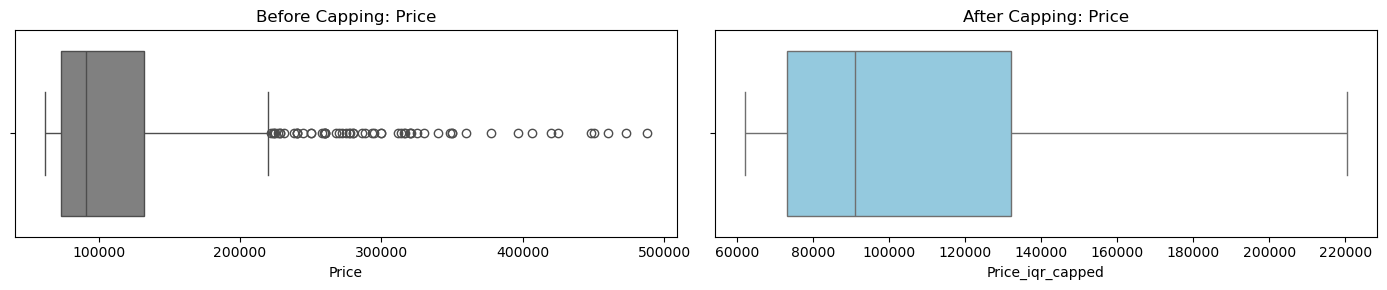

Discount: 3 outliers capped


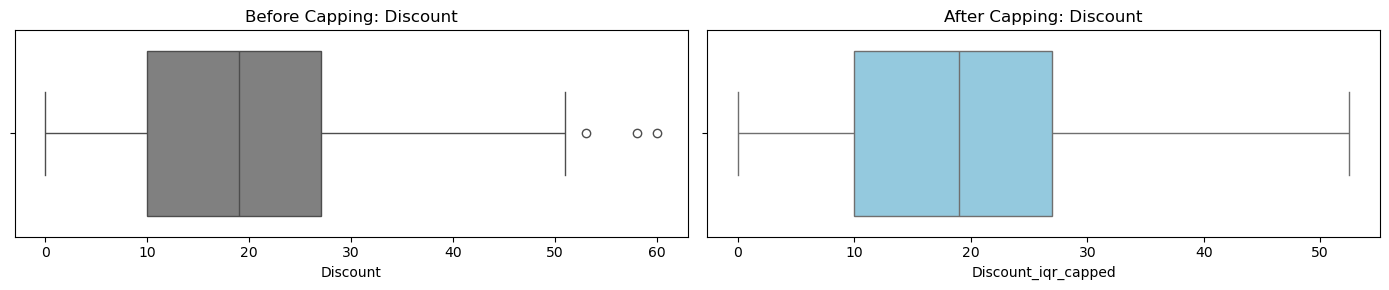

Original_price: 59 outliers capped


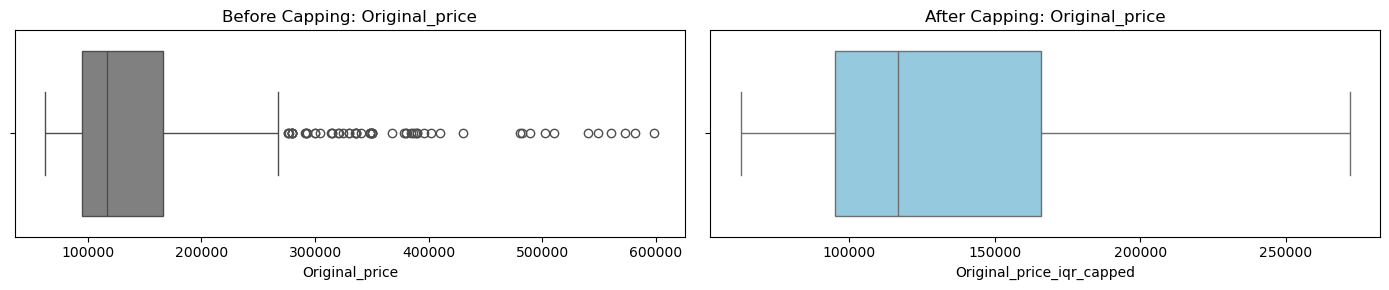

RAM_GB: 272 outliers capped


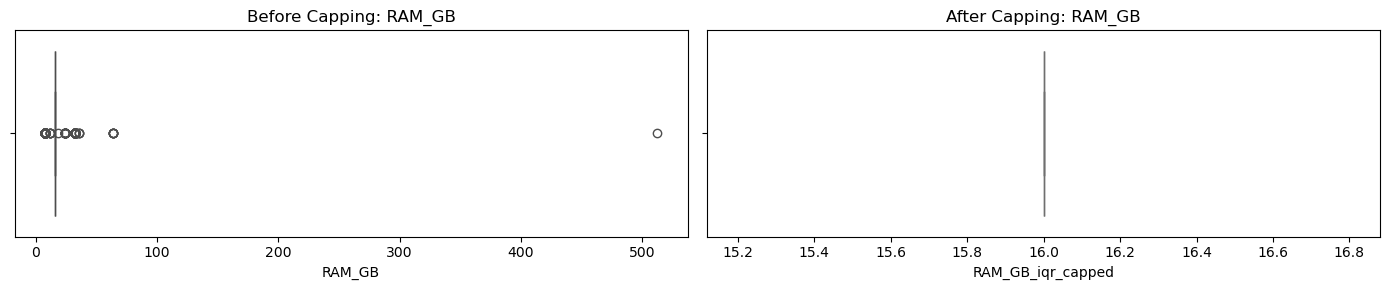

Storage_GB: 28 outliers capped


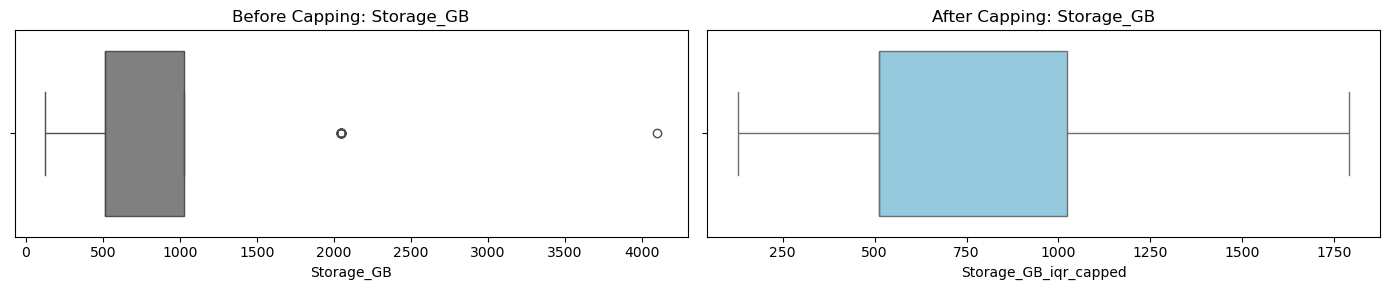

Display_cm: 1 outliers capped


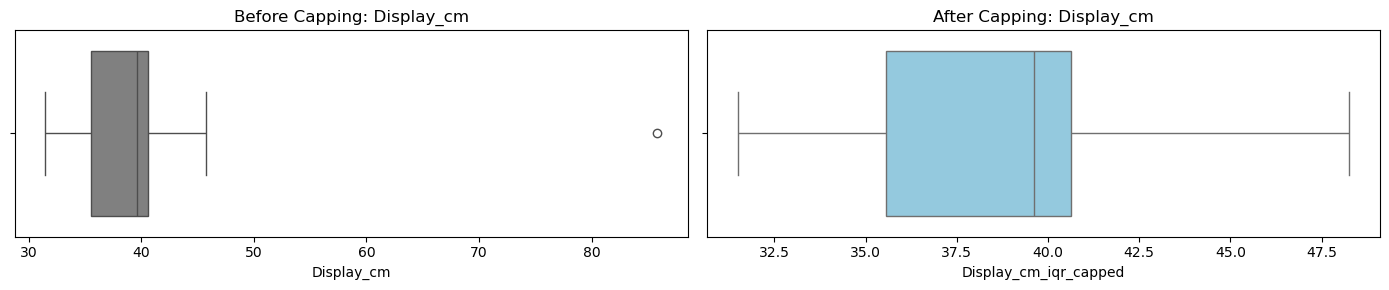

Display_inch: 1 outliers capped


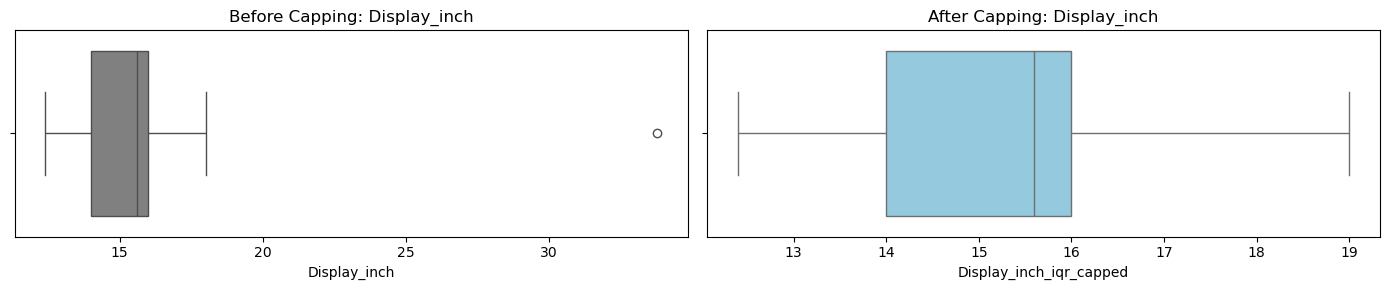

Warranty: 135 outliers capped


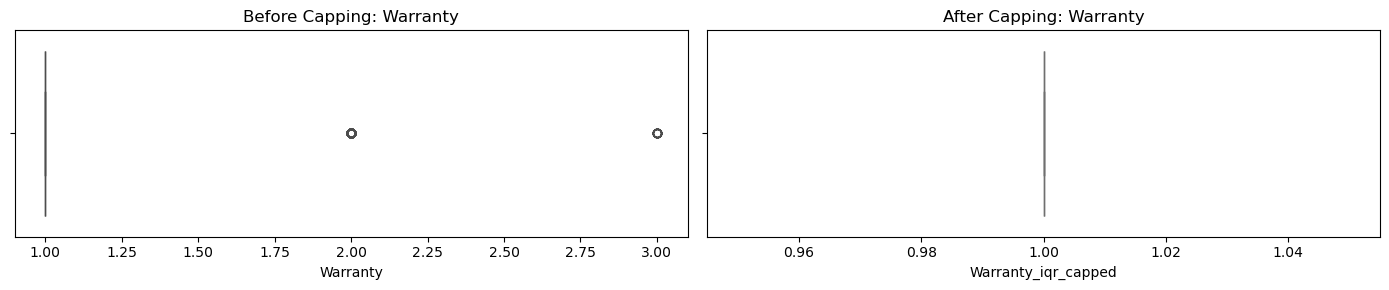

Processor_Gen_Num: 39 outliers capped


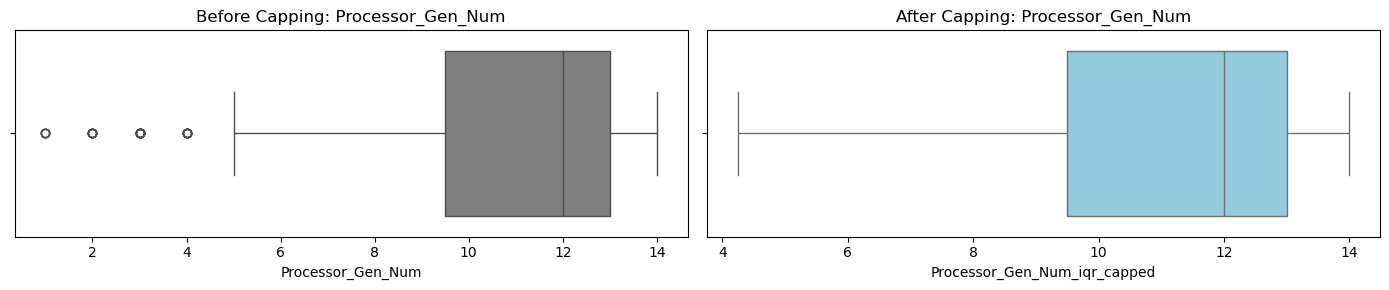


📊 Before vs After IQR Capping:



,mean_before,median_before,std_before,min_before,max_before,mean_after,median_after,std_after,min_after,max_after
Price,114967.34,90990.00,64296.64,61999.0,487990.00,109532.93,90990.00,46657.75,61999.00,220490.00
Discount,18.88,19.00,11.67,0.0,60.00,18.86,19.00,11.63,0.00,52.50
Original_price,143106.66,116859.00,77171.44,62589.0,598529.00,136634.53,116859.00,55663.22,62589.00,271990.00
RAM_GB,17.99,16.00,17.99,8.0,512.00,16.00,16.00,0.00,16.00,16.00
Storage_GB,759.71,512.00,361.42,128.0,4096.00,749.59,512.00,319.12,128.00,1792.00
Display_cm,38.47,39.62,3.09,31.5,85.80,38.43,39.62,2.68,31.50,48.26
Display_inch,15.15,15.60,1.22,12.4,33.78,15.13,15.60,1.06,12.40,19.00
Warranty,1.17,1.00,0.42,1.0,3.00,1.00,1.00,0.00,1.00,1.00
Processor_Gen_Num,11.54,12.00,2.62,1.0,14.00,11.60,12.00,2.42,4.25,14.00


In [515]:


# 1️⃣ Select numeric columns
num_col = df.select_dtypes(include=['float64', 'int64']).columns

# 2️⃣ Store stats before capping
before_stats = df[num_col].describe().T[['mean', '50%', 'std', 'min', 'max']]
before_stats.rename(columns={'50%': 'median'}, inplace=True)

# 3️⃣ Loop through each numeric column for IQR capping
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers capped")

    # Create a temporary capped column
    capped_col = f'{col}_iqr_capped'
    df[capped_col] = df[col].clip(lower=lower, upper=upper)

    # Plot before and after boxplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
    sns.boxplot(x=df[col], ax=axes[0], color='gray')
    axes[0].set_title(f'Before Capping: {col}')
    sns.boxplot(x=df[capped_col], ax=axes[1], color='skyblue')
    axes[1].set_title(f'After Capping: {col}')
    plt.tight_layout()
    plt.show()

    # Replace original column with capped values
    df[col] = df[capped_col]
    df.drop(columns=[capped_col], inplace=True)

# 4️⃣ Stats after capping
after_stats = df[num_col].describe().T[['mean', '50%', 'std', 'min', 'max']]
after_stats.rename(columns={'50%': 'median'}, inplace=True)

# 5️⃣ Combine before and after stats for comparison
comparison = before_stats.join(after_stats, lsuffix='_before', rsuffix='_after')

# 6️⃣ Show the summary comparison
print("\n📊 Before vs After IQR Capping:\n")
display(comparison.round(2))


In [516]:
df.columns

Index(['Brand', 'Processor_Brand', 'Processor_Full', 'Price', 'Discount',
       'Original_price', 'RAM_GB', 'OS', 'Platform', 'Storage_GB',
       'Storage_unit', 'Display_cm', 'Display_inch', 'Warranty',
       'Availability', 'Processor_Gen_Num', 'Clean_Description'],
      dtype='object')

In [517]:
new_df.to_csv('flipkart_laptop_cleaned.csv',index=False)

Phase 3 Conclusion & Next Steps

In this phase, we successfully:

Cleaned and standardized the laptop dataset.

Handled missing values, duplicates, and inconsistencies in features.

Extracted and engineered key attributes such as RAM, Storage, Display, Processor, Warranty, and Platform.

Capped outliers to reduce extreme variations while retaining important information.

Structured the dataset for smooth integration into Power BI for business visualization and analysis.

In [519]:
new_df.head(35)

,Brand,Processor_Brand,Processor_Full,Price,Discount,Original_price,RAM_GB,OS,Platform,Storage_GB,Storage_unit,Display_cm,Display_inch,Warranty,Availability,Processor_Gen_Num,Clean_Description
0,Dell,Intel,Intel Core Ultra 9 Processor,487990,18,598529.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
1,Dell,Intel,Intel Core Ultra 9 Processor,472990,18,581214.0,64.0,Windows 11,Windows,2048.0,TB,40.64,16.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
2,Msi,Intel,Intel Core Ultra 9 Processor,459990,17,559990.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,2.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
3,Asus,Intel,Intel Core Ultra 9 Processor,449990,11,509990.0,64.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
4,Dell,Intel,Intel Core Ultra 9 Processor,448490,21,572317.0,32.0,Windows 11,Windows,1024.0,TB,40.64,16.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 32 GB LPDDR5X RA...
5,Asus,Intel,Intel Core Ultra 9 Processor,424990,11,479990.0,32.0,Windows 11,Windows,2048.0,TB,40.64,16.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...
6,Msi,Intel,Intel Core Ultra 9 Processor,419990,12,481990.0,64.0,Windows 11,Windows,4096.0,TB,45.72,18.0,2.0,In Stock,14.0,Intel Core Ultra 9 Processor; 64 GB DDR5 RAM; ...
7,Dell,Intel,Intel Core Ultra 9 Processor,406490,19,502679.0,32.0,Windows 11,Windows,2048.0,TB,45.72,18.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...
8,Dell,Intel,Intel Core Ultra 9 Processor,396490,19,489538.0,32.0,Windows 11,Windows,2048.0,TB,40.64,16.0,1.0,In Stock,14.0,Intel Core Ultra 9 Processor; 32 GB DDR5 RAM; ...
9,Alienware,Intel,NVIDIA GeForce RTX 2080 with Max-Q,377798,0,377798.0,32.0,Windows 10,Windows,1024.0,TB,39.62,15.6,1.0,In Stock,10.0,NVIDIA GeForce RTX 2080 with Max-Q; 15.6 inch ...
